# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ahmad Hasan Mubarok
- **Email:** 112202106725@mhs.dinus.ac.id
- **ID Dicoding:** ahmadhasan15

## Menentukan Pertanyaan Bisnis

- Berapa total penjualan per kategori produk?
- Berapa produk per negara bagian?

## Import Semua Packages/Library yang Digunakan

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
customers_df = pd.read_csv("/dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP


In [7]:
geolocation_df = pd.read_csv("/dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
orderitem_df = pd.read_csv("/dataset/order_items_dataset.csv")
orderitem_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
orderpayment_df = pd.read_csv("/dataset/order_payments_dataset.csv")
orderpayment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [16]:
orderreview_df = pd.read_csv("/dataset/order_reviews_dataset.csv")
orderreview_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [19]:
order_df = pd.read_csv("/dataset/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
productcategory_df = pd.read_csv("/dataset/product_category_name_translation.csv")
productcategory_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [21]:
product_df = pd.read_csv("/dataset/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [22]:
seller_df = pd.read_csv("/dataset/sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Customer

In [23]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46159 entries, 0 to 46158
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               46159 non-null  object 
 1   customer_unique_id        46158 non-null  object 
 2   customer_zip_code_prefix  46158 non-null  float64
 3   customer_city             46158 non-null  object 
 4   customer_state            46158 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


In [24]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          1
customer_zip_code_prefix    1
customer_city               1
customer_state              1
dtype: int64

In [25]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
customers_df.describe()

,customer_zip_code_prefix
count,46158.000000
mean,35045.717405
std,29736.855839
min,1003.000000
25%,11355.000000
50%,24355.000000
75%,58280.000000
max,99990.000000


geolocation

In [27]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87480 entries, 0 to 87479
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  87480 non-null  int64  
 1   geolocation_lat              87480 non-null  float64
 2   geolocation_lng              87480 non-null  float64
 3   geolocation_city             87480 non-null  object 
 4   geolocation_state            87479 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 3.3+ MB


In [28]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              1
dtype: int64

In [29]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  34132


In [30]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,87480.000000,87480.000000,87480.000000
mean,2868.767181,-23.546761,-46.607469
std,1023.743533,0.049983,0.059750
min,1001.000000,-23.883184,-46.861371
25%,2123.000000,-23.581534,-46.650548
50%,3068.000000,-23.549854,-46.620881
75%,3733.000000,-23.504940,-46.568530
max,4387.000000,-23.216648,-46.370149


order item

In [31]:
orderitem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76182 entries, 0 to 76181
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             76182 non-null  object 
 1   order_item_id        76182 non-null  int64  
 2   product_id           76182 non-null  object 
 3   seller_id            76181 non-null  object 
 4   shipping_limit_date  76181 non-null  object 
 5   price                76181 non-null  float64
 6   freight_value        76181 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.1+ MB


In [32]:
orderitem_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              1
shipping_limit_date    1
price                  1
freight_value          1
dtype: int64

In [33]:
print("Jumlah duplikasi: ", orderitem_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
orderitem_df.describe()

,order_item_id,price,freight_value
count,76182.000000,76181.000000,76181.000000
mean,1.204615,120.557156,19.991808
std,0.743431,182.580579,15.738547
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.900000,16.280000
75%,1.000000,134.990000,21.180000
max,21.000000,6735.000000,409.680000


order payment

In [35]:
orderpayment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [36]:
orderpayment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [37]:
print("Jumlah duplikasi: ",orderpayment_df.duplicated().sum())

Jumlah duplikasi:  0


In [38]:
orderpayment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


order review

In [39]:
orderreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [40]:
orderreview_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [41]:
print("Jumlah duplikasi: ",orderreview_df.duplicated().sum())

Jumlah duplikasi:  0


In [42]:
orderreview_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


order

In [43]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [44]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [45]:
print("Jumlah duplikasi: ",order_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
order_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


product category

In [47]:
productcategory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [48]:
productcategory_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [49]:
print("Jumlah duplikasi: ",productcategory_df.duplicated().sum())

Jumlah duplikasi:  0


In [50]:
productcategory_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


product

In [51]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [52]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [53]:
print("Jumlah duplikasi: ",product_df.duplicated().sum())

Jumlah duplikasi:  0


In [54]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


seller

In [55]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [56]:
seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [57]:
print("Jumlah duplikasi: ",seller_df.duplicated().sum())

Jumlah duplikasi:  0


In [58]:
seller_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

customers

In [86]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          1
customer_zip_code_prefix    1
customer_city               1
customer_state              1
dtype: int64

In [87]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [91]:
customers_df['customer_unique_id'].fillna(customers_df['customer_unique_id'].mode()[0], inplace=True)
customers_df['customer_zip_code_prefix'].fillna(customers_df['customer_zip_code_prefix'].mode()[0], inplace=True)
customers_df['customer_city'].fillna(customers_df['customer_city'].mode()[0], inplace=True)
customers_df['customer_state'].fillna(customers_df['customer_state'].mode()[0], inplace=True)

In [92]:
print(customers_df.isna().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [93]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


geolocations

In [94]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              1
dtype: int64

In [95]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  34132


In [96]:
geolocation_df.drop_duplicates(inplace=True)

In [97]:
geolocation_df['geolocation_state'].fillna(geolocation_df['geolocation_state'].mode()[0], inplace=True)

In [98]:
print(geolocation_df.isna().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [99]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


**Orders**

In [59]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [62]:
print("Jumlah duplikasi: ", order_df.duplicated().sum())

Jumlah duplikasi:  0


In [66]:
datetime_columns = ["order_purchase_timestamp",	"order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
    order_df[column] = pd.to_datetime(order_df[column])

In [67]:
order_df['order_approved_at'].fillna(method='ffill', inplace=True)

In [69]:
order_df['order_delivered_carrier_date'].fillna(order_df['order_approved_at'], inplace=True)
order_df['order_delivered_customer_date'].fillna(order_df['order_approved_at'], inplace=True)

In [70]:
print(order_df.isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


orders item

In [72]:
orderitem_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              1
shipping_limit_date    1
price                  1
freight_value          1
dtype: int64

In [74]:
print("Jumlah duplikasi: ", orderitem_df.duplicated().sum())

Jumlah duplikasi:  0


In [75]:
orderitem_df['seller_id'].fillna(orderitem_df['seller_id'].mode()[0], inplace=True)
orderitem_df['shipping_limit_date'].fillna(orderitem_df['shipping_limit_date'].mode()[0], inplace=True)
orderitem_df['price'].fillna(orderitem_df['price'].mean(), inplace=True)
orderitem_df['freight_value'].fillna(orderitem_df['freight_value'].mean(), inplace=True)

In [77]:
print(orderitem_df.isna().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [84]:
print("Jumlah duplikasi: ", orderitem_df.duplicated().sum())

Jumlah duplikasi:  0


orders review

In [100]:
orderreview_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [101]:
print("Jumlah duplikasi: ", orderreview_df.duplicated().sum())

Jumlah duplikasi:  0


In [102]:
orderreview_df['review_comment_title'].fillna(orderreview_df['review_comment_title'].mode()[0], inplace=True)
orderreview_df['review_comment_message'].fillna(orderreview_df['review_comment_message'].mode()[0], inplace=True)

In [103]:
print(orderreview_df.isna().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


In [104]:
print("Jumlah duplikasi: ", orderreview_df.duplicated().sum())

Jumlah duplikasi:  0


products

In [78]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [79]:
product_df['product_category_name'].fillna(product_df['product_category_name'].mode()[0], inplace=True)
product_df['product_name_lenght'].fillna(product_df['product_name_lenght'].mode()[0], inplace=True)
product_df['product_description_lenght'].fillna(product_df['product_description_lenght'].mode()[0], inplace=True)
product_df['product_photos_qty'].fillna(product_df['product_photos_qty'].mode()[0], inplace=True)

In [80]:
product_df['product_weight_g'].fillna(product_df['product_weight_g'].mean(), inplace=True)
product_df['product_length_cm'].fillna(product_df['product_length_cm'].mean(), inplace=True)
product_df['product_height_cm'].fillna(product_df['product_height_cm'].mean(), inplace=True)
product_df['product_width_cm'].fillna(product_df['product_width_cm'].mean(), inplace=True)

In [82]:
print(product_df.isna().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [83]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

### Explore ...

orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


<ipython-input-113-c94d409debf7>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(order_df.describe())
<ipython-input-113-c94d409debf7>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(order_df.describe())
<ipython-input-113-c94d409debf7>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(order_df.describe())
<ipython-input-113-c94d409debf7>:5: FutureWarning: Treating date

                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   
first                                NaN                               NaN   
last                                 NaN                               NaN   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99441   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   
first           NaN      2016-09-04 21:15:19  2016-09-15 12:16:38   
last            NaN      2018-10-17 17:

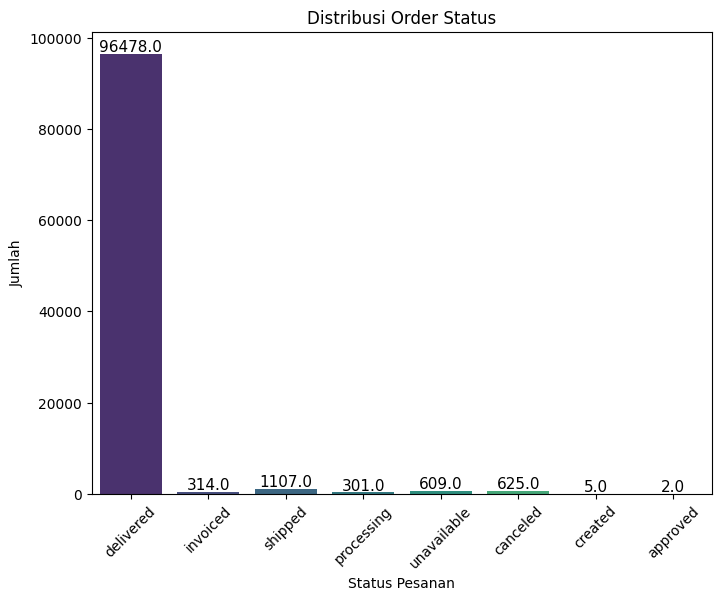

In [113]:
# Cetak informasi umum tentang dataset
print(order_df.info())

# Cetak statistik deskriptif untuk kolom-kolom numerik
print(order_df.describe())

# Eksplorasi distribusi kategori pada kolom order_status
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='order_status', data=order_df, hue='order_status', palette='viridis', legend=False)

plt.title('Distribusi Order Status')
plt.xlabel('Status Pesanan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

# Menambahkan nilai di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

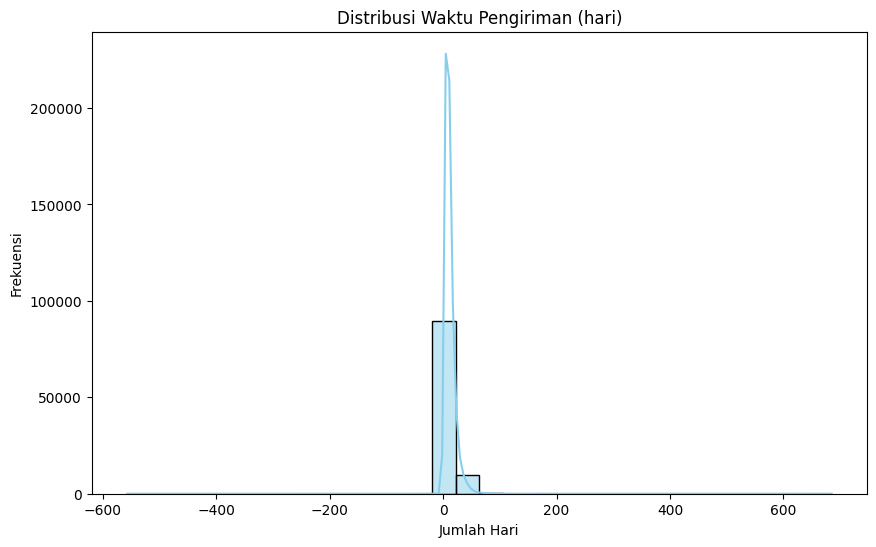

In [116]:
# Eksplorasi distribusi waktu antara order_purchase_timestamp dan order_delivered_customer_date
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
order_df['order_delivered_customer_date'] = pd.to_datetime(order_df['order_delivered_customer_date'])
order_df['delivery_time'] = order_df['order_delivered_customer_date'] - order_df['order_purchase_timestamp']

plt.figure(figsize=(10, 6))
sns.histplot(order_df['delivery_time'].dt.days, bins=30, kde=True, color='skyblue')
plt.title('Distribusi Waktu Pengiriman (hari)')
plt.xlabel('Jumlah Hari')
plt.ylabel('Frekuensi')
plt.show()

order item

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76182 entries, 0 to 76181
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             76182 non-null  object 
 1   order_item_id        76182 non-null  int64  
 2   product_id           76182 non-null  object 
 3   seller_id            76182 non-null  object 
 4   shipping_limit_date  76182 non-null  object 
 5   price                76182 non-null  float64
 6   freight_value        76182 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.1+ MB
None
       order_item_id         price  freight_value
count   76182.000000  76182.000000   76182.000000
mean        1.204615    120.557156      19.991808
std         0.743431    182.579381      15.738444
min         1.000000      0.850000       0.000000
25%         1.000000     39.900000      13.080000
50%         1.000000     74.900000      16.280000
75%         1.000000    1

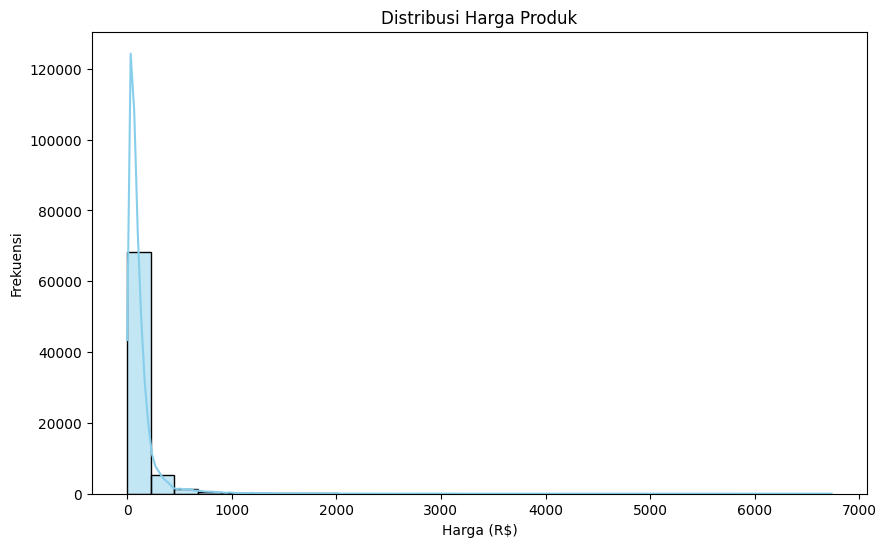

In [118]:
# Cetak informasi umum tentang dataset
print(orderitem_df.info())

# Cetak statistik deskriptif untuk kolom-kolom numerik
print(orderitem_df.describe())

# Eksplorasi distribusi harga produk (price)
plt.figure(figsize=(10, 6))
sns.histplot(orderitem_df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga (R$)')
plt.ylabel('Frekuensi')
plt.show()

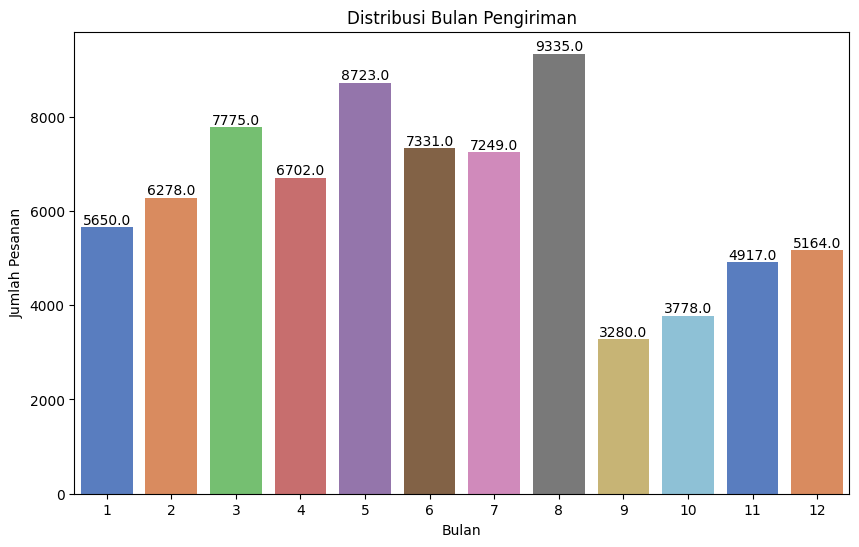

In [120]:
# Ubah kolom shipping_limit_date menjadi tipe data datetime
orderitem_df['shipping_limit_date'] = pd.to_datetime(orderitem_df['shipping_limit_date'])
orderitem_df['shipping_month'] = orderitem_df['shipping_limit_date'].dt.month

# Eksplorasi distribusi shipping_limit_date
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='shipping_month', data=orderitem_df, hue='shipping_month', palette='muted', legend=False)

plt.title('Distribusi Bulan Pengiriman')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')

# Menambahkan nilai di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

product

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32951.000000                32951.000000        32951.000000   
mean             48.690267                  764.6920

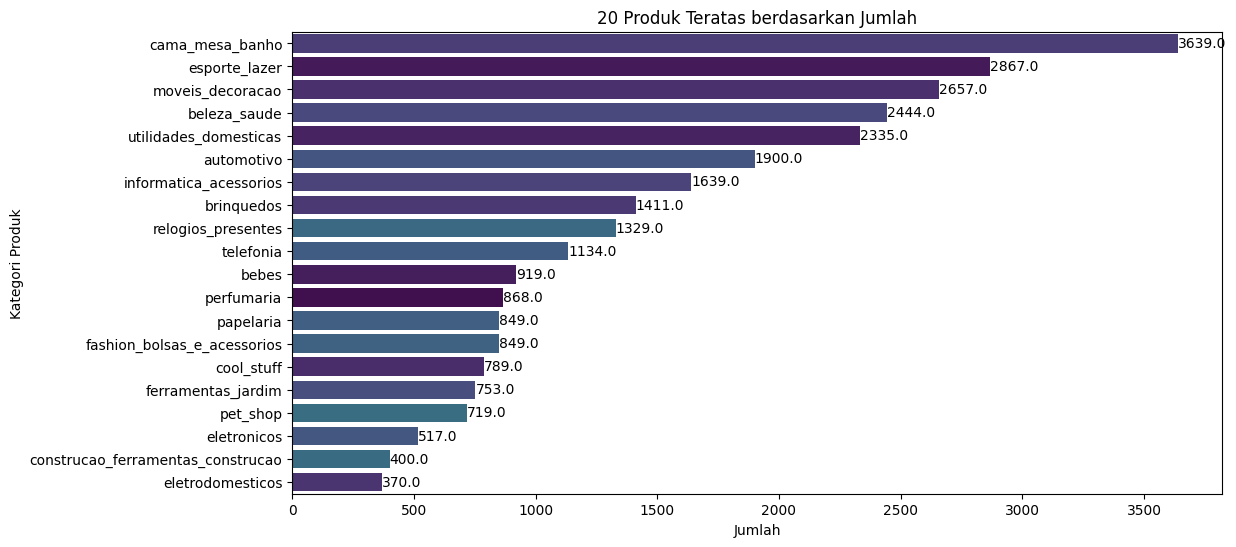

In [121]:
# Cetak informasi umum tentang dataset
print(product_df.info())

# Cetak statistik deskriptif untuk kolom-kolom numerik
print(product_df.describe())

# Mengelompokkan data dan menghitung jumlah produk dalam setiap kategori
top_products = product_df['product_category_name'].value_counts().head(20)

# Eksplorasi distribusi kategori produk (product_category_name)
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='product_category_name', data=product_df, order=top_products.index, hue='product_category_name', palette='viridis', legend=False)
plt.title('20 Produk Teratas berdasarkan Jumlah')
plt.xlabel('Jumlah')
plt.ylabel('Kategori Produk')

# Menambahkan nilai di samping setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black')

plt.show()

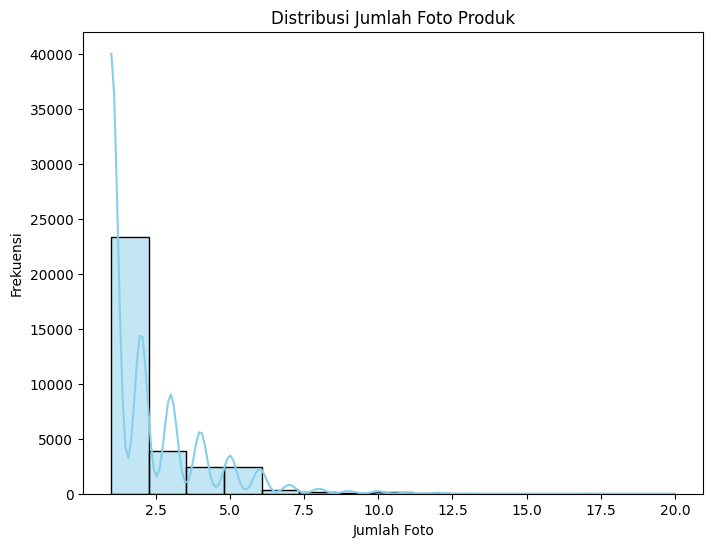

In [123]:
# Eksplorasi distribusi jumlah foto produk (product_photos_qty)
plt.figure(figsize=(8, 6))
sns.histplot(product_df['product_photos_qty'], bins=15, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Foto Produk')
plt.xlabel('Jumlah Foto')
plt.ylabel('Frekuensi')
plt.show()

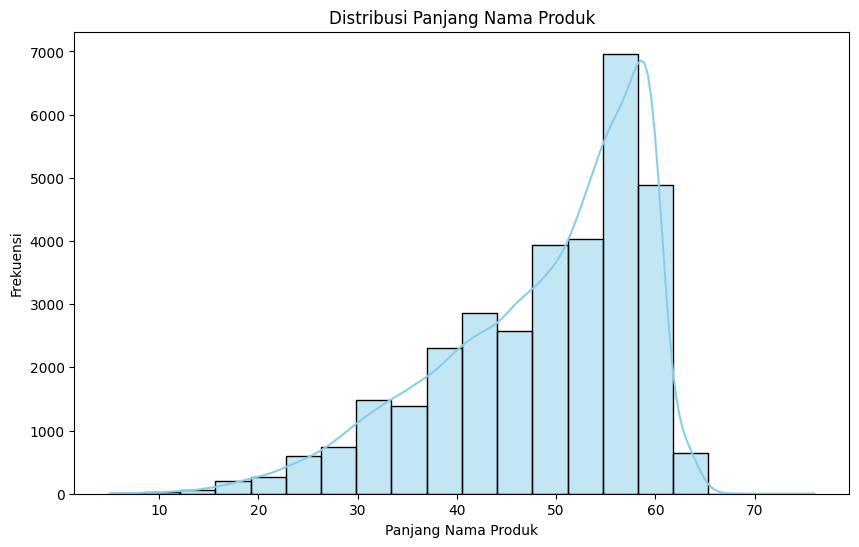

In [160]:
# Eksplorasi distribusi panjang nama produk (product_name_lenght)
plt.figure(figsize=(10, 6))
sns.histplot(product_df['product_name_lenght'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Panjang Nama Produk')
plt.xlabel('Panjang Nama Produk')
plt.ylabel('Frekuensi')
plt.show()

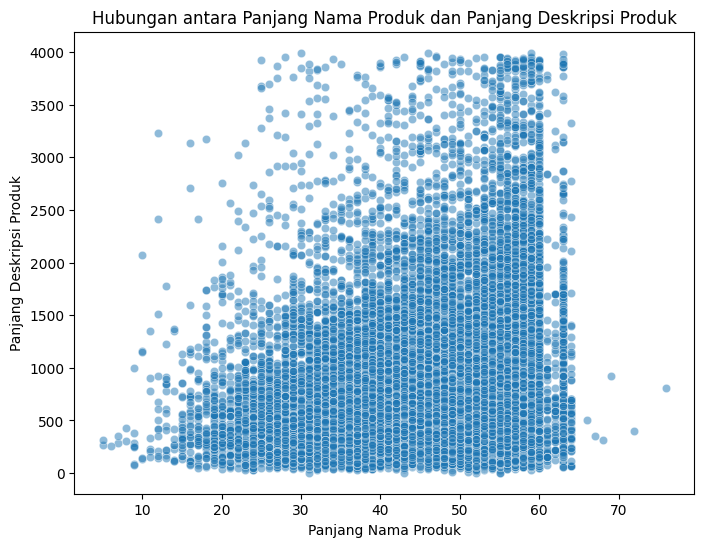

In [125]:
# Eksplorasi hubungan antara panjang nama produk (product_name_lenght) dan panjang deskripsi produk (product_description_lenght)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='product_name_lenght', y='product_description_lenght', data=product_df, alpha=0.5)
plt.title('Hubungan antara Panjang Nama Produk dan Panjang Deskripsi Produk')
plt.xlabel('Panjang Nama Produk')
plt.ylabel('Panjang Deskripsi Produk')
plt.show()

product category

In [126]:
print(productcategory_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


customers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46159 entries, 0 to 46158
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               46159 non-null  object 
 1   customer_unique_id        46159 non-null  object 
 2   customer_zip_code_prefix  46159 non-null  float64
 3   customer_city             46159 non-null  object 
 4   customer_state            46159 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.8+ MB
None


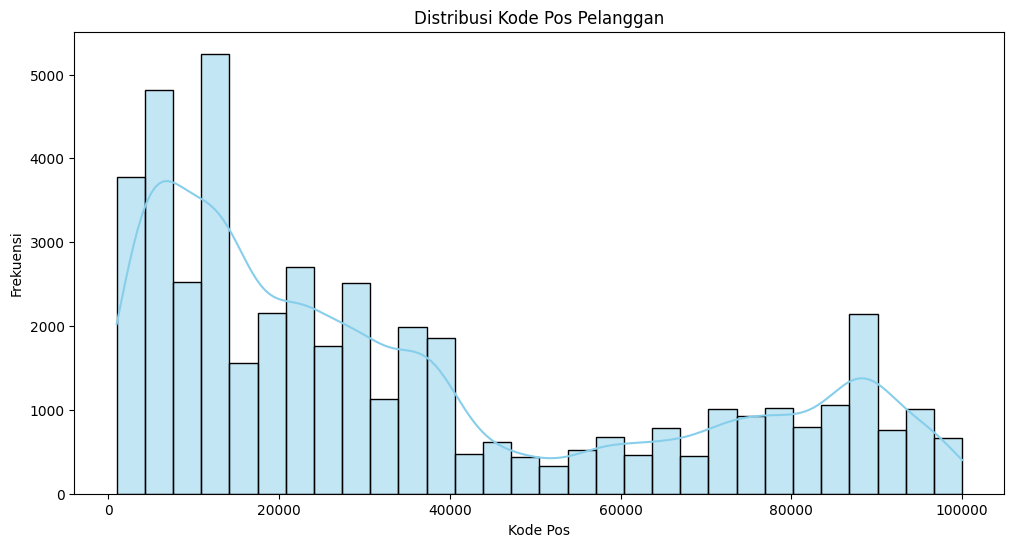

In [127]:
# Cetak informasi umum tentang dataset
print(customers_df.info())

# Eksplorasi distribusi kode pos pelanggan (customer_zip_code_prefix)
plt.figure(figsize=(12, 6))
sns.histplot(customers_df['customer_zip_code_prefix'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Kode Pos Pelanggan')
plt.xlabel('Kode Pos')
plt.ylabel('Frekuensi')
plt.show()

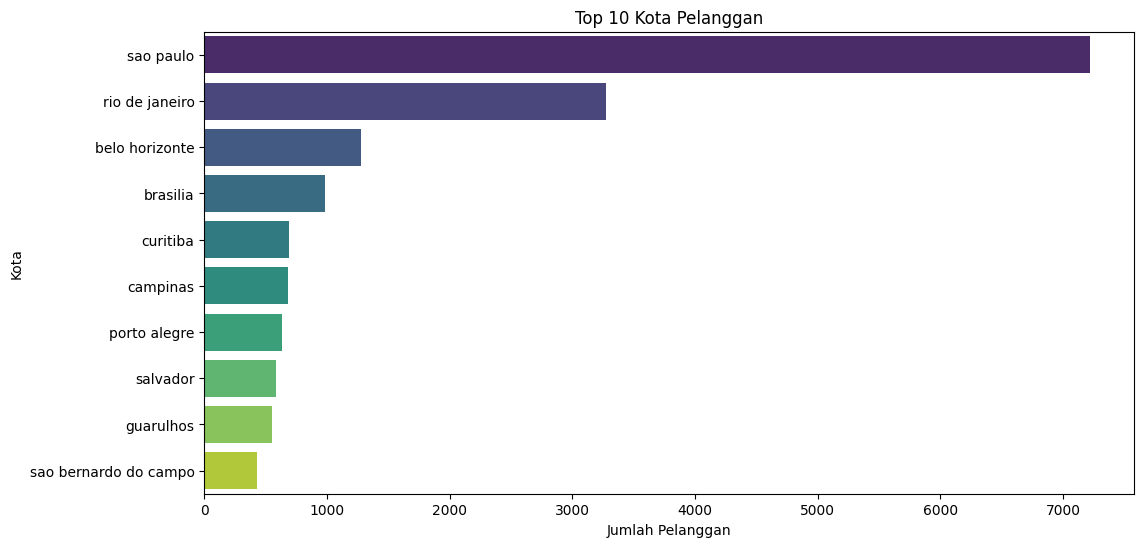

In [128]:
# Eksplorasi distribusi kota pelanggan (customer_city)
top_cities = customers_df['customer_city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette='viridis', legend=False)
plt.title('Top 10 Kota Pelanggan')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Kota')
plt.show()

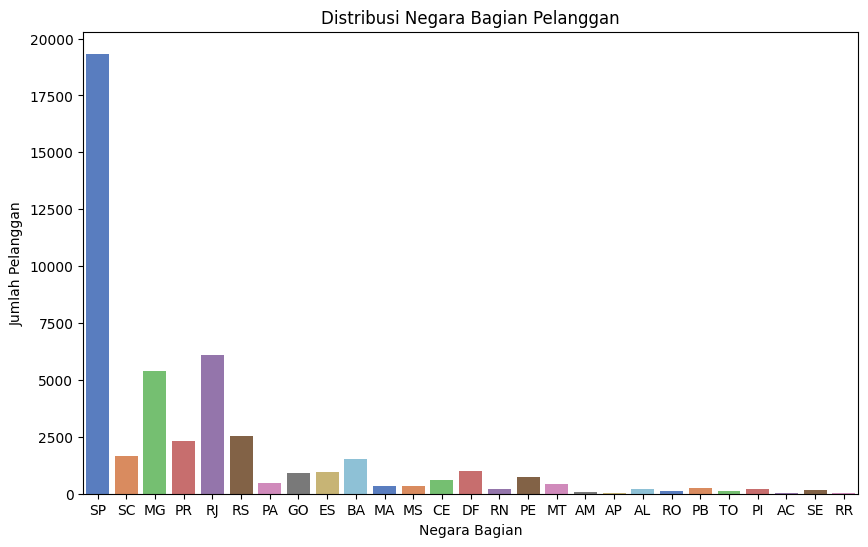

In [129]:
# Eksplorasi distribusi negara bagian pelanggan (customer_state)
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_state', data=customers_df, hue='customer_state', palette='muted', legend=False)
plt.title('Distribusi Negara Bagian Pelanggan')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pelanggan')
plt.show()

geolocation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53348 entries, 0 to 87479
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  53348 non-null  int64  
 1   geolocation_lat              53348 non-null  float64
 2   geolocation_lng              53348 non-null  float64
 3   geolocation_city             53348 non-null  object 
 4   geolocation_state            53348 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ MB
None
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 53348.000000     53348.000000     53348.000000
mean                   2954.493852       -23.543997       -46.602142
std                     975.604171         0.052329         0.063491
min                    1001.000000       -23.883184       -46.861371
25%                    2258.000000       -23.582348       -46.649720
50%  

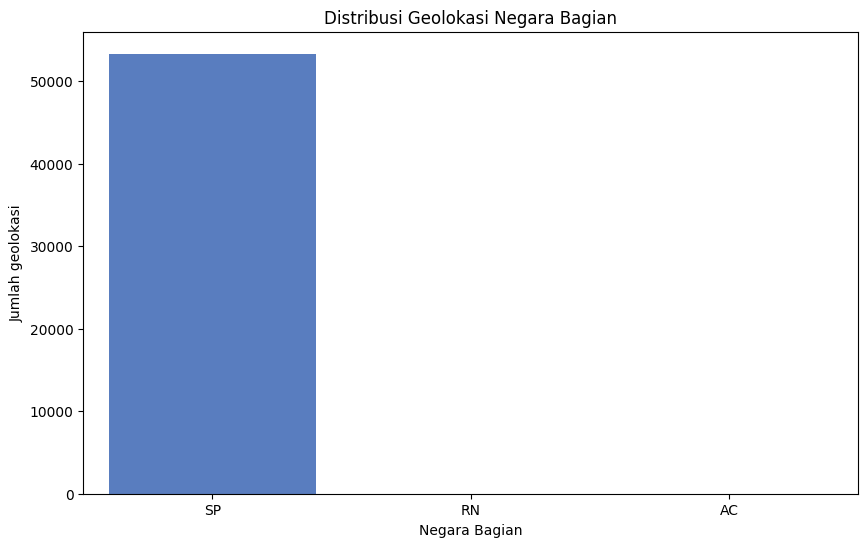

In [140]:
# Cetak informasi umum tentang dataset
print(geolocation_df.info())

# Cetak statistik deskriptif untuk kolom-kolom numerik
print(geolocation_df.describe())

# Eksplorasi distribusi geolokasi negara bagian  (geolocation_state)
plt.figure(figsize=(10, 6))
sns.countplot(x='geolocation_state', data=geolocation_df, hue='geolocation_state', palette='muted', legend=False)
plt.title('Distribusi Geolokasi Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah geolokasi')
plt.show()

order payment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1

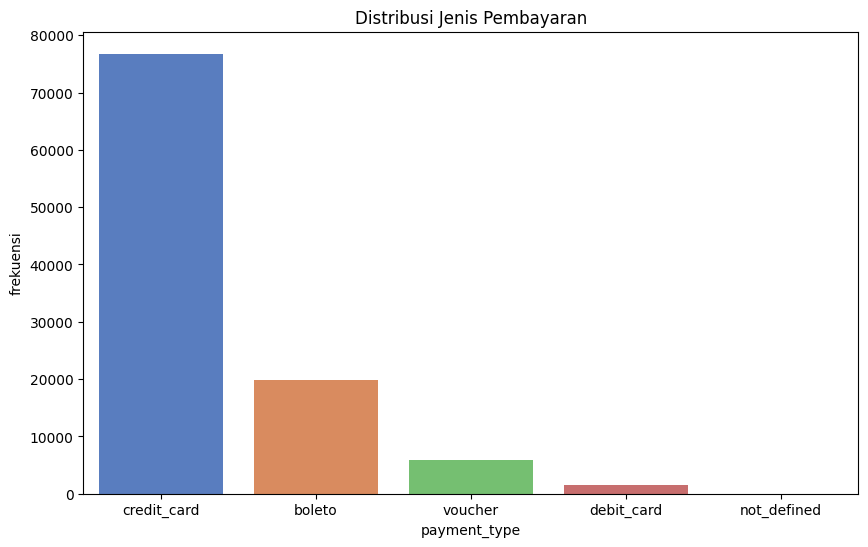

In [138]:
# Cetak informasi umum tentang dataset
print(orderpayment_df.info())

# Cetak statistik deskriptif untuk kolom-kolom numerik
print(orderpayment_df.describe())

# Eksplorasi distribusi jenis pembayaran (customer_state)
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', data=orderpayment_df, hue='payment_type', palette='muted', legend=False)
plt.title('Distribusi Jenis Pembayaran')
plt.xlabel('payment_type')
plt.ylabel('frekuensi')
plt.show()

Order review

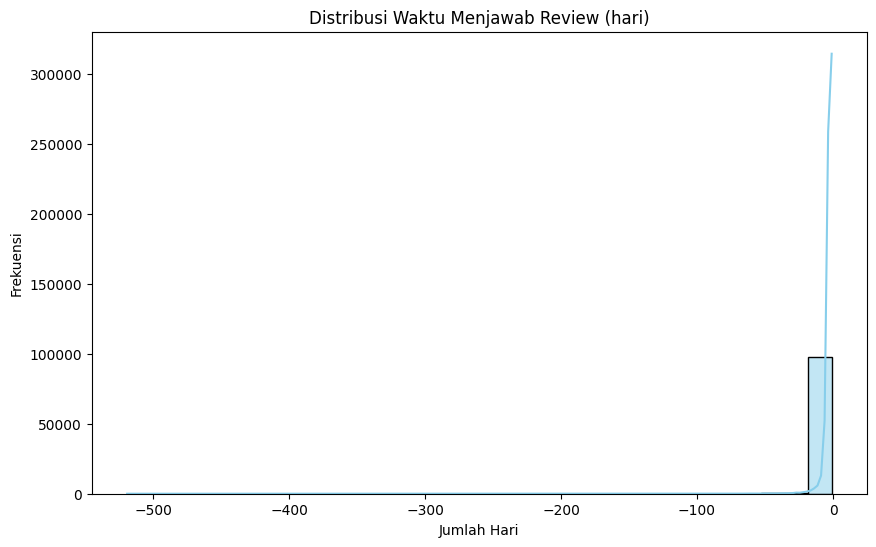

In [156]:
# Eksplorasi distribusi waktu antara review_answer_timestamp dan review_creation_date
orderreview_df['review_answer_timestamp'] = pd.to_datetime(orderreview_df['review_answer_timestamp'])
orderreview_df['review_creation_date'] = pd.to_datetime(orderreview_df['review_creation_date'])
orderreview_df['review_time'] = orderreview_df['review_creation_date'] - orderreview_df['review_answer_timestamp']

plt.figure(figsize=(10, 6))
sns.histplot(orderreview_df['review_time'].dt.days, bins=30, kde=True, color='skyblue')
plt.title('Distribusi Waktu Menjawab Review (hari)')
plt.xlabel('Jumlah Hari')
plt.ylabel('Frekuensi')
plt.show()

seller

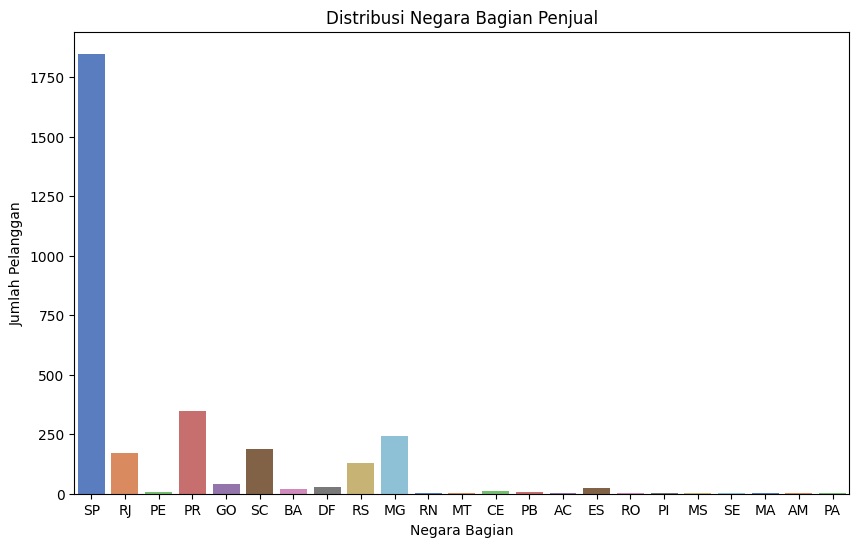

In [162]:
# Eksplorasi distribusi negara bagian penjual (seller_state)
plt.figure(figsize=(10, 6))
sns.countplot(x='seller_state', data=seller_df, hue='seller_state', palette='muted', legend=False)
plt.title('Distribusi Negara Bagian Penjual')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pelanggan')
plt.show()

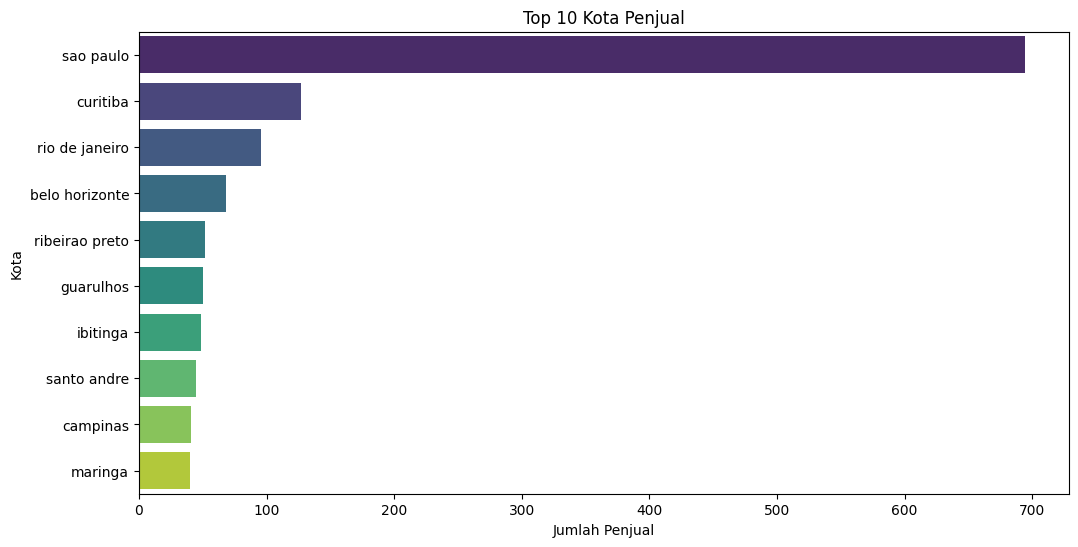

In [163]:
# Eksplorasi distribusi kota penjual (seller_city)
top_cities = seller_df['seller_city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette='viridis', legend=False)
plt.title('Top 10 Kota Penjual')
plt.xlabel('Jumlah Penjual')
plt.ylabel('Kota')
plt.show()

menggabunhkan seluruh dataframe

In [201]:
# Merge data
merged_data = order_df.merge(orderitem_df, on='order_id', how='inner') \
                    .merge(product_df, on='product_id', how='inner') \
                    .merge(productcategory_df, on='product_category_name', how='inner') \
                    .merge(customers_df, on='customer_id', how='inner')

merged_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,40c5e18f7d112b59b3e5113a59a905b3,67407057a7d5ee17d1cd09523f484d13,delivered,2018-06-11 10:25:52,2018-06-11 10:58:32,2018-06-14 13:03:00,2018-06-19 00:31:13,2018-07-16,7 days 14:05:21,1,...,1.0,400.0,19.0,13.0,19.0,perfumery,7cfba6e55439cae3fd2479d62fafe67f,22240.0,rio de janeiro,RJ
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,5 days 07:14:12,1,...,1.0,400.0,19.0,13.0,19.0,perfumery,8b8028d453a01986b48c4271cc341475,14500.0,ituverava,SP
2,9b85bbefeeacfebc3ff603d20511734f,7f4f07b97783e894fccff9d72e0988b3,delivered,2017-11-27 10:32:51,2017-11-27 11:14:36,2017-11-29 15:16:47,2017-12-07 19:48:32,2017-12-20,10 days 09:15:41,1,...,1.0,400.0,19.0,13.0,19.0,perfumery,293c9db44b6588c4e52fbef455fccde8,88085.0,florianopolis,SC
3,23450be385c992f3c2a398025c48db20,fa67ad79c559ad64c2831dfb5103a716,delivered,2017-12-16 20:06:22,2017-12-16 20:16:24,2017-12-18 16:14:38,2017-12-19 22:12:26,2018-01-05,3 days 02:06:04,1,...,1.0,400.0,19.0,13.0,19.0,perfumery,474a9bd593c96f177e663536da52feec,5547.0,sao paulo,SP
4,55d4ac8ab9f932ba5badbf6088b9a1c3,5342683414d08cd3656392950ecd915b,delivered,2017-11-04 14:36:45,2017-11-04 14:50:24,2017-11-07 18:58:40,2017-11-13 11:21:35,2017-11-24,8 days 20:44:50,1,...,1.0,400.0,19.0,13.0,19.0,perfumery,c1247f49e4171bb71b390a4eea026a56,14540.0,igarapava,SP


In [178]:
# Simpan ke dalam file CSV
merged_data.to_csv('all_merge_data.csv', index=False)

## Visualization & Explanatory Analysis

In [180]:
all_data = pd.read_csv('/content/all_merge_data.csv')

### Pertanyaan 1:

In [188]:
category_performance = all_data.groupby('product_category_name_english').agg({
    'order_item_id': 'sum',    # Jumlah produk terjual
    'price': 'mean'             # Rata-rata harga
}).reset_index()

category_performance = category_performance.sort_values(by='order_item_id', ascending=False)

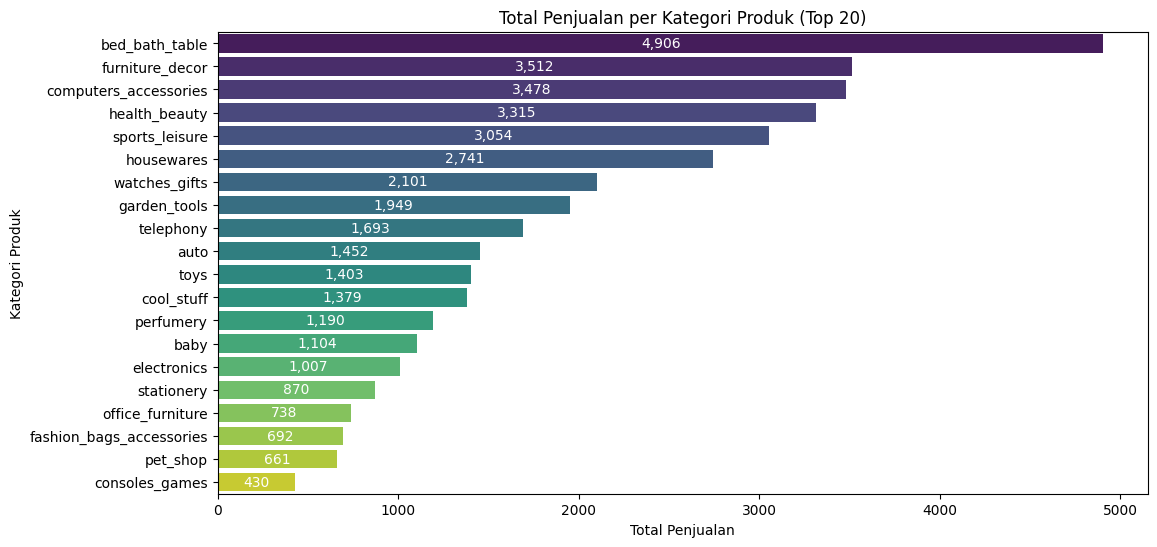

In [195]:
# Visualisasi total penjualan per kategori produk
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='order_item_id', y='product_category_name_english', data=category_performance[:20], hue='product_category_name_english', palette='viridis')
plt.title('Total Penjualan per Kategori Produk (Top 20)')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Produk')

# Menambahkan data di dalam setiap bar
for bar in bars.patches:
    # plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width()):,}', ha='left', va='center', color='black', fontsize=10)
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width()):,}', ha='center', va='center', color='white')

plt.show()

### Pertanyaan 2:

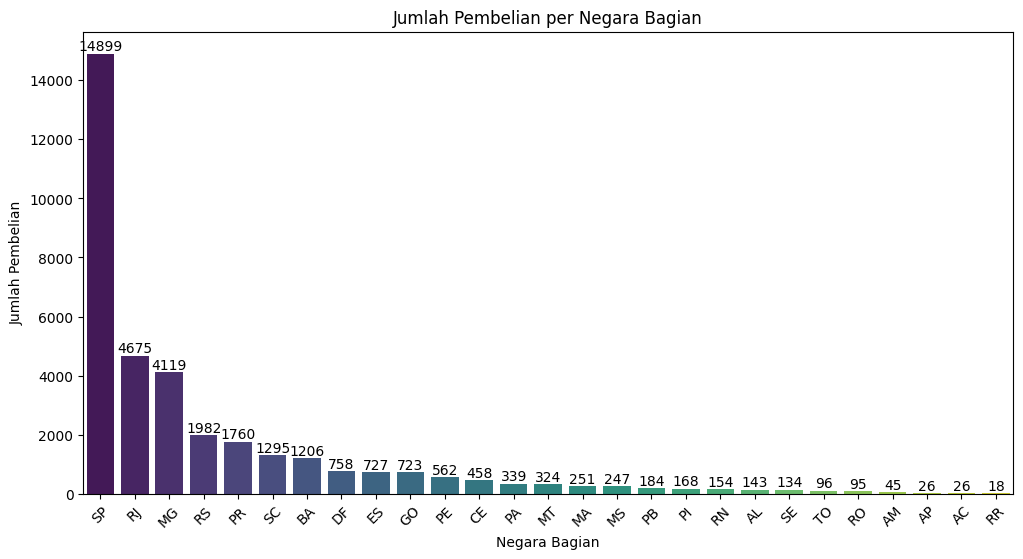

In [200]:
purchase_by_state = all_data.groupby('customer_state')['order_id'].count().reset_index().sort_values(by='order_id', ascending=False)
# Analisis Pembelian Berdasarkan Lokasi
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='customer_state', y='order_id', data=purchase_by_state, hue='customer_state', palette='viridis', dodge=False)
plt.title('Jumlah Pembelian per Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)

# Menampilkan nilai pada setiap bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom')

plt.show()

## Conclusion

- Jumlah penjualan produk tiap kategori yaitu
bed_bath_table = 4906
furniture_decor = 3512
computers_accessories = 3478
health_beauty = 3315
sports_leisure = 3054
housewares = 2741
watches_gifts = 2101
garden_tools = 1949
telephony = 1693
auto= 1452
toys = 1403
cool_stuff = 1379
perfumery = 1190
baby = 1104
electronics = 1007
stationery office = 870
furniture = 738
fashion_bags_accessories =692
pet_shop = 661
consoles_games = 430
- Conclution pertanyaan 2
SP = 4899
RJ = 4675
MG = 4119
RS = 1982
PR = 1760
SC = 1295
BA = 1206
DF = 758
ES = 727
GO =723
PE = 562
CE = 458
PA = 339
MT = 324
MA = 251
MS = 247
PB = 184
PI = 168
RN = 154
AL = 143
SE = 134
TO = 96
RO = 95
AM= 45
AP = 26
AC = 26
RR = 18